In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [21]:
categorical_val = []
continuous_val = []
for col in df.columns:
    if len(df[col].unique()) <= 10:
        categorical_val.append(col)
    else:
        continuous_val.append(col)

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

categorical_val.remove('target')

#transformation pipeline
transform_pipe = ColumnTransformer([
    ("continuous", StandardScaler(), continuous_val),
    ("categorical", OneHotEncoder(), categorical_val)#dummy elemets
])

In [24]:
#preprocessing
X_train = transform_pipe.fit_transform(X_train)
X_test = transform_pipe.transform(X_test)
X_train[:2]

array([[-1.67339636, -2.14786993, -0.88680513,  1.27119034, -0.93118976,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-2.76362385, -0.02777897, -0.79502487,  2.2844851 , -0.93118976,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ]])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test, train, print_clf_report=False, print_cf_matrix=False):
    if train == True:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print(f'Accuracy Score: {accuracy_score(y_train, pred) * 100:.4f}%')
        if print_clf_report:
            print('______________________________________________________________________')
            print(f'Classification Report:\n{clf_report}')
        if print_cf_matrix:
            print('______________________________________________________________________')
            print(f'Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n')
    elif train == False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print(f'Accuracy Score: {accuracy_score(y_test, pred) * 100:.4f}%')
        if print_clf_report:
            print('______________________________________________________________________')
            print(f'Classification Report:\n{clf_report}')
        if print_cf_matrix:
            print('______________________________________________________________________')
            print(f'Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n')

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier().fit(X_train, y_train)

In [27]:
print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)

Accuracy Score: 87.2642%


In [28]:
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Accuracy Score: 85.7143%


In [29]:
from sklearn.model_selection import cross_val_score
train_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    train_score.append(cv_score)

Maximum KNN score on the test data: 83.95% at k=8.
Maximum KNN score on the test data: 83.95% at k=8.


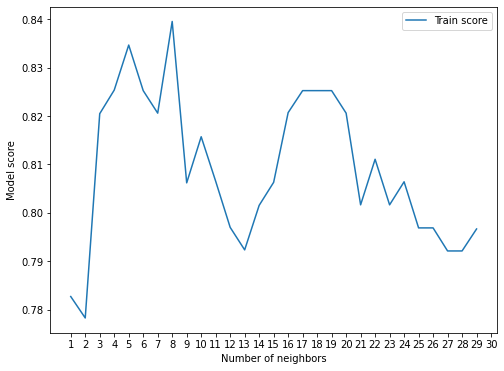

In [31]:
plt.figure(figsize=(8,6))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 31, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

# Find the maximum score
max_score = max(train_score)
# Find the index of maximum score and use it to calculate the best k
max_index = train_score.index(max(train_score))
best_k = max_index+1

print(f"Maximum KNN score on the test data: {max_score*100:.2f}% at k={best_k}.")

# short: print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}% at k={train_score.index(max(train_score))+1}.")

In [15]:
knn_clf_tuning = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)

In [16]:
print_score(knn_clf_tuning, X_train, y_train, X_test, y_test, train=True)

Accuracy Score: 85.3774%


In [17]:
print_score(knn_clf_tuning, X_train, y_train, X_test, y_test, train=False)

Accuracy Score: 85.7143%


In [18]:
knn_clf_test = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
knn_clf_train = accuracy_score(y_train, knn_clf.predict(X_train)) * 100
knn_clf_tuning_test = accuracy_score(y_test, knn_clf_tuning.predict(X_test)) * 100
knn_clf_tuning_train = accuracy_score(y_train, knn_clf_tuning.predict(X_train)) * 100

result = pd.DataFrame(columns=['Model', 'Non-tuning train accuracy %', 'Tuning train accuracy %', 'Non-tuning test accuracy %', 'Tuning test accuracy %'])
knn_result = pd.DataFrame(data=[['K-nearest neighbors', knn_clf_train, knn_clf_tuning_train, knn_clf_test, knn_clf_tuning_test]],
                        columns=['Model', 'Non-tuning train accuracy %', 'Tuning train accuracy %', 'Non-tuning test accuracy %', 'Tuning test accuracy %'])
result = result.append(knn_result, ignore_index=True)
result

Model  Non-tuning train accuracy %  Tuning train accuracy %  \
0  K-nearest neighbors                    87.264151                85.377358   

   Non-tuning test accuracy %  Tuning test accuracy %  
0                   85.714286               85.714286